In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import cross_val_score, StratifiedKFold , train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

In [2]:
match_df = pd.read_csv('match_cluster.csv')


In [3]:
match_df = match_df.drop(['Unnamed: 0','link_odsp','adv_stats'], axis = 1)
match_df.head()

,id_odsp,date,league,season,country,ht,at,fthg,ftag,lead_change,late_goals,id_event,avg_goal_diff,cluster,month,year
0,UFot0hit/,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.0,1.0,110,1.835165,0,8,2011
1,Aw5DflLH/,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,4.0,1.0,122,0.340659,1,8,2011
2,bkjpaC6n/,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.0,1.0,137,0.450549,2,8,2011
3,CzPV312a/,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.0,0.0,114,0.692308,2,8,2011
4,GUOdmtII/,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,1.0,0.0,90,0.626374,3,8,2011


In [54]:
england = match_df[match_df.country == 'england']
england.head()

,id_odsp,date,league,season,country,ht,at,fthg,ftag,lead_change,late_goals,id_event,avg_goal_diff,cluster,month,year
3062,foAjBseC/,2013-10-05,E0,2014,england,Hull,Aston Villa,0,0,0.0,0.0,80,0.000000,3,10,2013
3063,GfBnCNu6/,2013-10-05,E0,2014,england,Fulham,Stoke City,1,0,1.0,1.0,104,0.136842,3,10,2013
3067,j7h8TOAt/,2013-10-05,E0,2014,england,Sunderland,Manchester Utd,1,2,3.0,0.0,94,0.824176,1,10,2013
3068,l89fA1AI/,2013-10-05,E0,2014,england,Liverpool,Crystal Palace,3,1,1.0,0.0,81,2.105263,0,10,2013
3069,ngSc9LPO/,2013-10-05,E0,2014,england,Manchester City,Everton,3,1,3.0,0.0,97,0.831579,1,10,2013


In [97]:
spain = match_df[match_df.country == 'spain']
spain.head()

,id_odsp,date,league,season,country,ht,at,fthg,ftag,lead_change,late_goals,id_event,avg_goal_diff,cluster,month,year
59,CtEdUSdJ/,2011-08-27,SP1,2012,spain,Sporting Gijon,Real Sociedad,1,2,1.0,0.0,99,0.648352,3,8,2011
63,jRPmWlS6/,2011-08-27,SP1,2012,spain,Valencia,Racing Santander,4,3,5.0,2.0,103,0.890110,1,8,2011
73,C88uY13B/,2011-08-28,SP1,2012,spain,Real Zaragoza,Real Madrid,0,6,1.0,2.0,137,2.087912,0,8,2011
76,tvgGyp4n/,2011-08-28,SP1,2012,spain,Sevilla,Malaga,2,1,1.0,1.0,85,1.582418,0,8,2011
77,UaoTYsl5/,2011-08-28,SP1,2012,spain,Athletic Bilbao,Rayo Vallecano,1,1,2.0,0.0,117,0.065934,2,8,2011


In [98]:
germany = match_df[match_df.country == 'germany']
germany.head()

,id_odsp,date,league,season,country,ht,at,fthg,ftag,lead_change,late_goals,id_event,avg_goal_diff,cluster,month,year
0,UFot0hit/,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.0,1.0,110,1.835165,0,8,2011
1,Aw5DflLH/,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,4.0,1.0,122,0.340659,1,8,2011
2,bkjpaC6n/,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.0,1.0,137,0.450549,2,8,2011
5,lOpzwMkp/,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,1.0,1.0,135,0.120879,2,8,2011
9,Wn69eU5B/,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,1.0,2.0,118,0.890110,2,8,2011


In [99]:
france = match_df[match_df.country == 'france']
france.head()

,id_odsp,date,league,season,country,ht,at,fthg,ftag,lead_change,late_goals,id_event,avg_goal_diff,cluster,month,year
3,CzPV312a/,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.0,0.0,114,0.692308,2,8,2011
4,GUOdmtII/,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,1.0,0.0,90,0.626374,3,8,2011
6,M7PhlM2C/,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.0,0.0,115,0.516484,2,8,2011
7,QuWqjrYa/,2011-08-06,F1,2012,france,AC Ajaccio,Toulouse,0,2,1.0,0.0,118,0.703297,2,8,2011
8,UBZQ4smg/,2011-08-06,F1,2012,france,Nice,Lyon,1,3,3.0,0.0,129,0.868132,1,8,2011


In [100]:
italy = match_df[match_df.country == 'italy']
italy.head()

,id_odsp,date,league,season,country,ht,at,fthg,ftag,lead_change,late_goals,id_event,avg_goal_diff,cluster,month,year
84,W0scuwXc/,2011-09-09,I1,2012,italy,AC Milan,Lazio,2,2,2.0,0.0,111,0.318681,2,9,2011
102,zesOOHnH/,2011-09-10,I1,2012,italy,Cesena,Napoli,1,3,3.0,1.0,104,0.538462,1,9,2011
105,Ait1vcn4/,2011-09-11,I1,2012,italy,Palermo,Internazionale,4,3,5.0,3.0,118,0.274725,1,9,2011
107,EotSNy2N/,2011-09-11,I1,2012,italy,Chievo Verona,Novara,2,2,2.0,1.0,122,0.912088,2,9,2011
110,jiZlsa2o/,2011-09-11,I1,2012,italy,Juventus,Parma,4,1,1.0,2.0,86,1.461538,0,9,2011


In [4]:
## Easier to write a function to return league and year dataframe instead of pipeline it

def dummy_year_pipe(df, yr):
    ## df for only that league and season
    df_year = df[df.season == yr]
    
    ## getting unique clubs to create dummy vars for which two teams are playing
    df_yr_clubs = pd.unique(df_year[['ht','at']].values.ravel())
    
    ## drop first alphabetical club for comparison, return in DF to append to original df
    clubs = np.sort(df_yr_clubs)[1:len(df_yr_clubs)]
    club_df = pd.DataFrame(columns = clubs)
    
    df_year = df_year.append(club_df)
    
    for club in clubs:
        for i, row in df_year.iterrows():
            if row['ht'] == club or row['at'] == club:
                dummy = 1
            else:
                dummy = 0
            df_year.loc[i, club] = dummy
            
    return df_year

In [8]:
X_train = train[[u'AC Milan', u'AJ Auxerre', u'AS Nancy Lorraine', u'AS Roma',
       u'Atalanta', u'Athletic Bilbao', u'Atletico Madrid', u'Barcelona',
       u'Bayer Leverkusen', u'Bayern Munich', u'Bologna', u'Bordeaux',
       u'Borussia Dortmund', u'Borussia Monchengladbach', u'Brest', u'Caen',
       u'Cagliari', u'Catania', u'Cesena', u'Chievo Verona', u'Dijon FCO',
       u'Espanyol', u'Evian Thonon Gaillard', u'FC Augsburg', u'FC Cologne',
       u'Fiorentina', u'Genoa', u'Getafe', u'Granada', u'Hamburg SV',
       u'Hannover 96', u'Hertha Berlin', u'Internazionale', u'Juventus',
       u'Kaiserslautern', u'Lazio', u'Lecce', u'Levante', u'Lille', u'Lorient',
       u'Lyon', u'Mainz', u'Malaga', u'Mallorca', u'Marseille', u'Montpellier',
       u'Napoli', u'Nice', u'Novara', u'Nurnberg', u'Osasuna', u'Palermo',
       u'Paris Saint-Germain', u'Parma', u'Racing Santander',
       u'Rayo Vallecano', u'Real Betis', u'Real Madrid', u'Real Sociedad',
       u'Real Zaragoza', u'SC Freiburg', u'Schalke 04', u'Sevilla', u'Siena',
       u'Sochaux', u'Sporting Gijon', u'St Etienne', u'Stade Rennes',
       u'TSG Hoffenheim', u'Toulouse', u'Udinese', u'Valencia',
       u'Valenciennes', u'VfB Stuttgart', u'VfL Wolfsburg', u'Villarreal',
       u'Werder Bremen']]
y_train = train['cluster']
X_test = test[[u'AC Milan', u'AJ Auxerre', u'AS Nancy Lorraine', u'AS Roma',
       u'Atalanta', u'Athletic Bilbao', u'Atletico Madrid', u'Barcelona',
       u'Bayer Leverkusen', u'Bayern Munich', u'Bologna', u'Bordeaux',
       u'Borussia Dortmund', u'Borussia Monchengladbach', u'Brest', u'Caen',
       u'Cagliari', u'Catania', u'Cesena', u'Chievo Verona', u'Dijon FCO',
       u'Espanyol', u'Evian Thonon Gaillard', u'FC Augsburg', u'FC Cologne',
       u'Fiorentina', u'Genoa', u'Getafe', u'Granada', u'Hamburg SV',
       u'Hannover 96', u'Hertha Berlin', u'Internazionale', u'Juventus',
       u'Kaiserslautern', u'Lazio', u'Lecce', u'Levante', u'Lille', u'Lorient',
       u'Lyon', u'Mainz', u'Malaga', u'Mallorca', u'Marseille', u'Montpellier',
       u'Napoli', u'Nice', u'Novara', u'Nurnberg', u'Osasuna', u'Palermo',
       u'Paris Saint-Germain', u'Parma', u'Racing Santander',
       u'Rayo Vallecano', u'Real Betis', u'Real Madrid', u'Real Sociedad',
       u'Real Zaragoza', u'SC Freiburg', u'Schalke 04', u'Sevilla', u'Siena',
       u'Sochaux', u'Sporting Gijon', u'St Etienne', u'Stade Rennes',
       u'TSG Hoffenheim', u'Toulouse', u'Udinese', u'Valencia',
       u'Valenciennes', u'VfB Stuttgart', u'VfL Wolfsburg', u'Villarreal',
       u'Werder Bremen']]
y_test = test['cluster']

In [9]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [24]:
## guide for using multi-class prediction XGBoost

xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4

watchlist = [(xg_train,'train'), (xg_test, 'test')]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist );
# get prediction
pred = bst.predict( xg_test );

[0]	train-merror:0.556463	test-merror:0.65528
[1]	train-merror:0.545578	test-merror:0.663043
[2]	train-merror:0.545578	test-merror:0.661491
[3]	train-merror:0.540136	test-merror:0.667702
[4]	train-merror:0.540136	test-merror:0.667702


In [ ]:
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist );
yprob = bst.predict( xg_test ).reshape( y_test.shape[0], 4 )
ylabel = np.argmax(yprob, axis=1)

In [27]:
yprob

array([[ 0.22992329,  0.20177852,  0.32427084,  0.24402735],
       [ 0.22027227,  0.2495105 ,  0.29643291,  0.23378432],
       [ 0.26139805,  0.23211528,  0.2890012 ,  0.21748547],
       ..., 
       [ 0.21509743,  0.24364877,  0.30336127,  0.23789248],
       [ 0.20529623,  0.2325466 ,  0.28953823,  0.27261895],
       [ 0.2171825 ,  0.2460106 ,  0.30630195,  0.23050499]], dtype=float32)

In [29]:
print 'Model Accuracy Score:' 
print accuracy_score(y_test, pred)
print 'Model Confusion Matrix:' 
print confusion_matrix(y_test, pred)
print 'Model Classification Report:' 
print classification_report(y_test, pred)

Model Accuracy Score:
0.332298136646
Model Confusion Matrix:
[[ 11   9  74   4]
 [ 21   9 113  15]
 [ 15  22 187   9]
 [ 11  14 123   7]]
Model Classification Report:
             precision    recall  f1-score   support

        0.0       0.19      0.11      0.14        98
        1.0       0.17      0.06      0.08       158
        2.0       0.38      0.80      0.51       233
        3.0       0.20      0.05      0.07       155

avg / total       0.25      0.33      0.25       644



In [30]:
### Leveraged next few cells from sklearn to calculate and plot roc-auc for multi-class


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Binarize the output

y = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], yprob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), yprob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

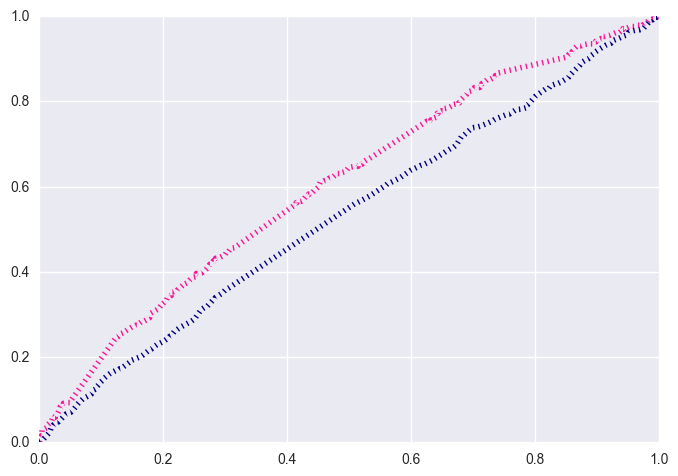

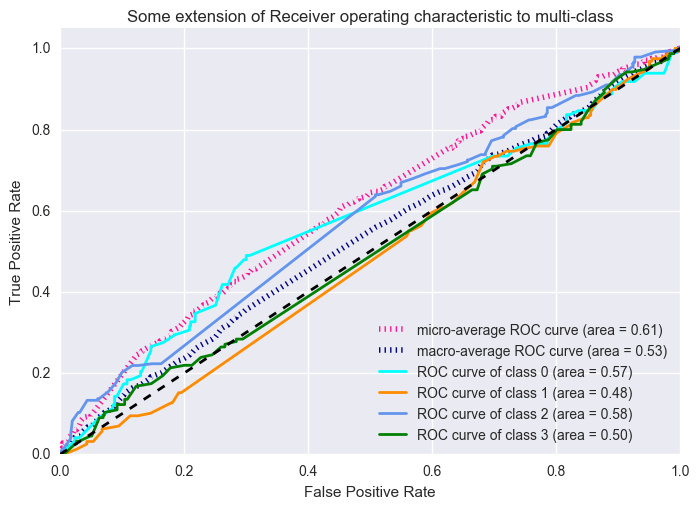

In [33]:
### from sklearn
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Model is created above.

The results above show that the model could use some work. Some of the features could be tweaked to allow these clusters to be slightly more predictive. However, we will continue with the clusters created to predict the watchability of all future matches in the rest of the 2016-2017 season for each league.

The model that we use takes in the two teams that are playing in a match, and then predicts the watchability based on those two teams. Since this data has unique matches occurring only within leagues, a predictive model will have to be trained and fit for each league for the current season. I have obtained the remaining league fixtures from the point after data was provided, and run each league through the same process to obtain results.

### First, England.

In [191]:
england_train_17 = dummy_year_pipe(england, 2017)

In [192]:
epl_17 = pd.read_csv('epl_17_fixtures.csv', encoding = 'utf-8')

In [193]:
epl_17.loc[epl_17.Team1 == 'Leicester', 'Team1'] = 'Leicester City'
epl_17.loc[epl_17.Team2 == 'Leicester', 'Team2'] = 'Leicester City'
epl_17.loc[epl_17.Team1 == 'Manchester United', 'Team1'] = 'Manchester Utd'
epl_17.loc[epl_17.Team2 == 'Manchester United', 'Team2'] = 'Manchester Utd'
epl_17.loc[epl_17.Team1 == 'Stoke', 'Team1'] = 'Stoke City'
epl_17.loc[epl_17.Team2 == 'Stoke', 'Team2'] = 'Stoke City'
epl_17.loc[epl_17.Team1 == 'tottenham', 'Team1'] = 'Tottenham'
epl_17.loc[epl_17.Team2 == 'tottenham', 'Team2'] = 'Tottenham'
epl_17.loc[epl_17.Team1 == 'chelsea', 'Team1'] = 'Chelsea'
epl_17.loc[epl_17.Team2 == 'chelsea', 'Team2'] = 'Chelsea'
epl_17.loc[epl_17.Team1 == 'Arsenal', 'Team1'] = 'Arsenal'
epl_17.loc[epl_17.Team2 == 'Arsenal', 'Team2'] = 'Arsenal'

In [194]:
epl_17_clubs = pd.unique(epl_17[['Team1','Team2']].values.ravel())
    
    ## drop first alphabetical club for comparison, return in DF to append to original df
clubs = np.sort(epl_17_clubs)[1:len(epl_17_clubs)]
club_df = pd.DataFrame(columns = clubs)
    
epl_17 = epl_17.append(club_df)
    
for club in clubs:
    for i, row in epl_17.iterrows():
        if row['Team1'] == club or row['Team2'] == club:
            dummy = 1
        else:
            dummy = 0
        epl_17.loc[i, club] = dummy


In [195]:
X_train = england_train_17[[u'Bournemouth', u'Burnley', u'Chelsea', u'Crystal Palace', u'Everton',
       u'Hull', u'Leicester City', u'Liverpool', u'Manchester City',
       u'Manchester Utd', u'Middlesbrough', u'Southampton', u'Stoke City',
       u'Sunderland', u'Swansea', u'Tottenham', u'Watford', u'West Brom',
       u'West Ham']]
y_train = england_train_17['cluster']
X_test = epl_17[[u'Bournemouth', u'Burnley', u'Chelsea', u'Crystal Palace', u'Everton',
       u'Hull', u'Leicester City', u'Liverpool', u'Manchester City',
       u'Manchester Utd', u'Middlesbrough', u'Southampton', u'Stoke City',
       u'Sunderland', u'Swansea', u'Tottenham', u'Watford', u'West Brom',
       u'West Ham']]
## y_test = test['cluster']

X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [196]:
xg_train_17 = xgb.DMatrix( X_train, label=y_train)
xg_test_17 = xgb.DMatrix(X_test)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4
param['eval_metric'] = 'auc'

num_round = 5
bst_17 = xgb.train(param, xg_train_17, num_round)
# get prediction
pred_17 = bst_17.predict( xg_test_17 );

In [177]:
pred_17

array([ 3.,  3.,  3.,  1.,  3.,  3.,  0.,  0.,  3.,  3.,  0.,  1.,  3.,
        3.,  3.,  3.,  3.,  0.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  1.,  3.,  1.,  3.,  3.,  1.,  3.,  3.,  3.,  3.,  3.,  3.,
        0.,  3.,  1.,  3.,  0.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,
        1.,  3.,  3.,  1.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,
        3.,  3.,  0.,  3.,  1.,  1.,  1.,  3.,  3.,  3.,  0.,  3.,  0.,
        3.,  3.,  1.,  3.,  0.,  3.,  3.,  3.,  3.,  1.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  0.,  1.,  3.,  3.,  3.,  1.,  1.,  3.,  3.,
        3.,  3.,  3.,  0.,  3.,  3.,  3.,  3.,  3.,  0.,  3.,  3.,  3.,
        1.,  3.,  2.,  3.,  1.,  3.,  3.,  3.,  3.,  3.,  2.,  3.,  3.,
        3.,  3.,  0.,  0.,  3.,  3.,  1.,  3.,  3.,  3.,  3.], dtype=float32)

In [197]:
epl_17_predict = epl_17.drop([u'Bournemouth', u'Burnley', u'Chelsea', u'Crystal Palace', u'Everton',
       u'Hull', u'Leicester City', u'Liverpool', u'Manchester City',
       u'Manchester Utd', u'Middlesbrough', u'Southampton', u'Stoke City',
       u'Sunderland', u'Swansea', u'Tottenham', u'Watford', u'West Brom',
       u'West Ham'], axis = 1)
epl_17_predict['cluster'] = pred_17

In [198]:
epl_17_predict

,Team1,Team2,date_time,cluster
0,Arsenal,Hull,11:02. 13:30,3.0
1,Manchester Utd,Watford,11:02. 16:00,3.0
2,Middlesbrough,Everton,11:02. 16:00,3.0
3,Stoke City,Crystal Palace,11:02. 16:00,1.0
4,Sunderland,Southampton,11:02. 16:00,3.0
5,West Ham,West Brom,11:02. 16:00,3.0
6,Liverpool,Tottenham,11:02. 18:30,0.0
7,Burnley,Chelsea,12:02. 14:30,0.0
8,Swansea,Leicester City,12:02. 17:00,3.0
9,Bournemouth,Manchester City,13:02. 21:00,3.0


## Spain Below

In [112]:
spain_train_17 = dummy_year_pipe(spain, 2017)

esp_17 = pd.read_csv('esp_17_fixtures.csv', encoding = 'utf-8')

In [113]:
esp_17.loc[esp_17.Team1 == 'Ath. Bilbao', 'Team1'] = 'Athletic Bilbao'
esp_17.loc[esp_17.Team2 == 'Ath. Bilbao', 'Team2'] = 'Athletic Bilbao'
esp_17.loc[esp_17.Team1 == 'Atl. Madrid', 'Team1'] = 'Atletico Madrid'
esp_17.loc[esp_17.Team2 == 'Atl. Madrid', 'Team2'] = 'Atletico Madrid'
esp_17.loc[esp_17.Team1 == 'Betis', 'Team1'] = 'Real Betis'
esp_17.loc[esp_17.Team2 == 'Betis', 'Team2'] = 'Real Betis'
esp_17.loc[esp_17.Team1 == 'Gijon', 'Team1'] = 'Sporting Gijon'
esp_17.loc[esp_17.Team2 == 'Gijon', 'Team2'] = 'Sporting Gijon'
esp_17.loc[esp_17.Team1 == 'La Coruna', 'Team1'] = 'Deportivo La Coruna'
esp_17.loc[esp_17.Team2 == 'La Coruna', 'Team2'] = 'Deportivo La Coruna'

In [114]:
esp_17_clubs = pd.unique(esp_17[['Team1','Team2']].values.ravel())
    
    ## drop first alphabetical club for comparison, return in DF to append to original df
clubs = np.sort(esp_17_clubs)[1:len(esp_17_clubs)]
club_df = pd.DataFrame(columns = clubs)
    
esp_17 = esp_17.append(club_df)
    
for club in clubs:
    for i, row in esp_17.iterrows():
        if row['Team1'] == club or row['Team2'] == club:
            dummy = 1
        else:
            dummy = 0
        esp_17.loc[i, club] = dummy
        
print spain_train_17.columns
print esp_17.columns

Index([u'Athletic Bilbao', u'Atletico Madrid', u'Barcelona', u'Celta Vigo',
       u'Deportivo La Coruna', u'Eibar', u'Espanyol', u'Granada',
       u'Las Palmas', u'Leganes', u'Malaga', u'Osasuna', u'Real Betis',
       u'Real Madrid', u'Real Sociedad', u'Sevilla', u'Sporting Gijon',
       u'Valencia', u'Villarreal', u'at', u'avg_goal_diff', u'cluster',
       u'country', u'date', u'ftag', u'fthg', u'ht', u'id_event', u'id_odsp',
       u'late_goals', u'lead_change', u'league', u'month', u'season', u'year'],
      dtype='object')
Index([    u'Athletic Bilbao',     u'Atletico Madrid',           u'Barcelona',
                u'Celta Vigo', u'Deportivo La Coruna',               u'Eibar',
                  u'Espanyol',             u'Granada',          u'Las Palmas',
                   u'Leganes',              u'Malaga',             u'Osasuna',
                u'Real Betis',         u'Real Madrid',       u'Real Sociedad',
                   u'Sevilla',      u'Sporting Gijon',             

In [115]:
X_train = spain_train_17[[u'Athletic Bilbao', u'Atletico Madrid', u'Barcelona', u'Celta Vigo',
       u'Deportivo La Coruna', u'Eibar', u'Espanyol', u'Granada',
       u'Las Palmas', u'Leganes', u'Malaga', u'Osasuna', u'Real Betis',
       u'Real Madrid', u'Real Sociedad', u'Sevilla', u'Sporting Gijon',
       u'Valencia', u'Villarreal']]
y_train = spain_train_17['cluster']
X_test = esp_17[[u'Athletic Bilbao', u'Atletico Madrid', u'Barcelona', u'Celta Vigo',
       u'Deportivo La Coruna', u'Eibar', u'Espanyol', u'Granada',
       u'Las Palmas', u'Leganes', u'Malaga', u'Osasuna', u'Real Betis',
       u'Real Madrid', u'Real Sociedad', u'Sevilla', u'Sporting Gijon',
       u'Valencia', u'Villarreal']]
## y_test = test['cluster']

X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [116]:
xg_train_17 = xgb.DMatrix( X_train, label=y_train)
xg_test_17 = xgb.DMatrix(X_test)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4
param['eval_metric'] = 'auc'

num_round = 5
bst_17 = xgb.train(param, xg_train_17, num_round)
# get prediction
pred_17 = bst_17.predict( xg_test_17 );

In [117]:
esp_17_predict = esp_17.drop([u'Athletic Bilbao', u'Atletico Madrid', u'Barcelona', u'Celta Vigo',
       u'Deportivo La Coruna', u'Eibar', u'Espanyol', u'Granada',
       u'Las Palmas', u'Leganes', u'Malaga', u'Osasuna', u'Real Betis',
       u'Real Madrid', u'Real Sociedad', u'Sevilla', u'Sporting Gijon',
       u'Valencia', u'Villarreal'], axis = 1)
esp_17_predict['cluster'] = pred_17



,Team1,Team2,date_time,cluster
0,Espanyol,Real Sociedad,10.02. 20:45,3.0
1,Real Betis,Valencia,11.02. 13:00,1.0
2,Alaves,Barcelona,11.02. 16:15,0.0
3,Athletic Bilbao,Deportivo La Coruna,11.02. 18:30,1.0
4,Osasuna,Real Madrid,11.02. 20:45,0.0


In [119]:
esp_17_predict.head()

,Team1,Team2,date_time,cluster
0,Espanyol,Real Sociedad,10.02. 20:45,3.0
1,Real Betis,Valencia,11.02. 13:00,1.0
2,Alaves,Barcelona,11.02. 16:15,0.0
3,Athletic Bilbao,Deportivo La Coruna,11.02. 18:30,1.0
4,Osasuna,Real Madrid,11.02. 20:45,0.0


## Germany Below

In [128]:
germ_train_17 = dummy_year_pipe(germany, 2017)

ger_17 = pd.read_csv('ger_17_fixtures.csv', encoding = 'utf-8')

ger_17.loc[ger_17.Team1 == 'Dortmund', 'Team1'] = 'Borussia Dortmund'
ger_17.loc[ger_17.Team2 == 'Dortmund', 'Team2'] = 'Borussia Dortmund'
ger_17.loc[ger_17.Team1 == 'Monchengladbach', 'Team1'] = 'Borussia Monchengladbach'
ger_17.loc[ger_17.Team2 == 'Monchengladbach', 'Team2'] = 'Borussia Monchengladbach'
ger_17.loc[ger_17.Team1 == 'Darmstadt', 'Team1'] = 'SV Darmstadt 98'
ger_17.loc[ger_17.Team2 == 'Darmstadt', 'Team2'] = 'SV Darmstadt 98'
ger_17.loc[ger_17.Team1 == 'Leverkusen', 'Team1'] = 'Bayer Leverkusen'
ger_17.loc[ger_17.Team2 == 'Leverkusen', 'Team2'] = 'Bayer Leverkusen'
ger_17.loc[ger_17.Team1 == 'Augsburg', 'Team1'] = 'FC Augsburg'
ger_17.loc[ger_17.Team2 == 'Augsburg', 'Team2'] = 'FC Augsburg'
ger_17.loc[ger_17.Team1 == 'FC Koln', 'Team1'] = 'FC Cologne'
ger_17.loc[ger_17.Team2 == 'FC Koln', 'Team2'] = 'FC Cologne'
ger_17.loc[ger_17.Team1 == 'Freiburg', 'Team1'] = 'SC Freiburg'
ger_17.loc[ger_17.Team2 == 'Freiburg', 'Team2'] = 'SC Freiburg'
ger_17.loc[ger_17.Team1 == 'Hamburger SV', 'Team1'] = 'Hamburg SV'
ger_17.loc[ger_17.Team2 == 'Hamburger SV', 'Team2'] = 'Hamburg SV'
ger_17.loc[ger_17.Team1 == 'Frankfurt', 'Team1'] = 'Eintracht Frankfurt'
ger_17.loc[ger_17.Team2 == 'Frankfurt', 'Team2'] = 'Eintracht Frankfurt'
ger_17.loc[ger_17.Team1 == 'Hertha', 'Team1'] = 'Hertha Berlin'
ger_17.loc[ger_17.Team2 == 'Hertha', 'Team2'] = 'Hertha Berlin'
ger_17.loc[ger_17.Team1 == 'Hoffenheim', 'Team1'] = 'TSG Hoffenheim'
ger_17.loc[ger_17.Team2 == 'Hoffenheim', 'Team2'] = 'TSG Hoffenheim'
ger_17.loc[ger_17.Team1 == 'Ingolstadt', 'Team1'] = 'FC Ingolstadt 04'
ger_17.loc[ger_17.Team2 == 'Ingolstadt', 'Team2'] = 'FC Ingolstadt 04'
ger_17.loc[ger_17.Team1 == 'Schalke', 'Team1'] = 'Schalke 04'
ger_17.loc[ger_17.Team2 == 'Schalke', 'Team2'] = 'Schalke 04'
ger_17.loc[ger_17.Team1 == 'Wolfsburg', 'Team1'] = 'VfL Wolfsburg'
ger_17.loc[ger_17.Team2 == 'Wolfsburg', 'Team2'] = 'VfL Wolfsburg'

In [130]:
print germ_train_17.columns
print ger_17.columns

Index([u'Bayern Munich', u'Borussia Dortmund', u'Borussia Monchengladbach',
       u'Eintracht Frankfurt', u'FC Augsburg', u'FC Cologne',
       u'FC Ingolstadt 04', u'Hamburg SV', u'Hertha Berlin', u'Mainz',
       u'RB Leipzig', u'SC Freiburg', u'SV Darmstadt 98', u'Schalke 04',
       u'TSG Hoffenheim', u'VfL Wolfsburg', u'Werder Bremen', u'at',
       u'avg_goal_diff', u'cluster', u'country', u'date', u'ftag', u'fthg',
       u'ht', u'id_event', u'id_odsp', u'late_goals', u'lead_change',
       u'league', u'month', u'season', u'year'],
      dtype='object')
Index([           u'Bayern Munich',        u'Borussia Dortmund',
       u'Borussia Monchengladbach',      u'Eintracht Frankfurt',
                    u'FC Augsburg',               u'FC Cologne',
               u'FC Ingolstadt 04',               u'Hamburg SV',
                  u'Hertha Berlin',                    u'Mainz',
                     u'RB Leipzig',              u'SC Freiburg',
                u'SV Darmstadt 98',       

In [129]:
ger_17_clubs = pd.unique(ger_17[['Team1','Team2']].values.ravel())
    
    ## drop first alphabetical club for comparison, return in DF to append to original df
clubs = np.sort(ger_17_clubs)[1:len(ger_17_clubs)]
club_df = pd.DataFrame(columns = clubs)
    
ger_17 = ger_17.append(club_df)
    
for club in clubs:
    for i, row in ger_17.iterrows():
        if row['Team1'] == club or row['Team2'] == club:
            dummy = 1
        else:
            dummy = 0
        ger_17.loc[i, club] = dummy
        

In [131]:
X_train = germ_train_17[[u'Bayern Munich', u'Borussia Dortmund', u'Borussia Monchengladbach',
       u'Eintracht Frankfurt', u'FC Augsburg', u'FC Cologne',
       u'FC Ingolstadt 04', u'Hamburg SV', u'Hertha Berlin', u'Mainz',
       u'RB Leipzig', u'SC Freiburg', u'SV Darmstadt 98', u'Schalke 04',
       u'TSG Hoffenheim', u'VfL Wolfsburg', u'Werder Bremen']]
y_train = germ_train_17['cluster']
X_test = ger_17[[u'Bayern Munich', u'Borussia Dortmund', u'Borussia Monchengladbach',
       u'Eintracht Frankfurt', u'FC Augsburg', u'FC Cologne',
       u'FC Ingolstadt 04', u'Hamburg SV', u'Hertha Berlin', u'Mainz',
       u'RB Leipzig', u'SC Freiburg', u'SV Darmstadt 98', u'Schalke 04',
       u'TSG Hoffenheim', u'VfL Wolfsburg', u'Werder Bremen']]
## y_test = test['cluster']

X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [132]:
xg_train_17 = xgb.DMatrix( X_train, label=y_train)
xg_test_17 = xgb.DMatrix(X_test)
param = {}
param['objective'] = 'multi:softmax'
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4
param['eval_metric'] = 'auc'

num_round = 5
bst_17 = xgb.train(param, xg_train_17, num_round)
# get prediction
pred_17 = bst_17.predict( xg_test_17 );

In [133]:
ger_17_predict = ger_17.drop([u'Bayern Munich', u'Borussia Dortmund', u'Borussia Monchengladbach',
       u'Eintracht Frankfurt', u'FC Augsburg', u'FC Cologne',
       u'FC Ingolstadt 04', u'Hamburg SV', u'Hertha Berlin', u'Mainz',
       u'RB Leipzig', u'SC Freiburg', u'SV Darmstadt 98', u'Schalke 04',
       u'TSG Hoffenheim', u'VfL Wolfsburg', u'Werder Bremen'], axis = 1)
ger_17_predict['cluster'] = pred_17



In [149]:
ger_17_predict.head()

,Team1,Team2,date_time,cluster
0,Mainz,FC Augsburg,10:02. 20:30,3.0
1,SV Darmstadt 98,Borussia Dortmund,11:02. 15:30,2.0
2,FC Ingolstadt 04,Bayern Munich,11:02. 15:30,2.0
3,Bayer Leverkusen,Eintracht Frankfurt,11:02. 15:30,3.0
4,RB Leipzig,Hamburg SV,11:02. 15:30,2.0


## Italy Below

In [145]:
ita_train_17 = dummy_year_pipe(italy, 2017)

ita_17 = pd.read_csv('ita_17_fixtures.csv', encoding = 'utf-8')

ita_17.loc[ita_17.Team1 == 'Chievo', 'Team1'] = 'Chievo Verona'
ita_17.loc[ita_17.Team2 == 'Chievo', 'Team2'] = 'Chievo Verona'
ita_17.loc[ita_17.Team1 == 'inter', 'Team1'] = 'Internazionale'
ita_17.loc[ita_17.Team2 == 'inter', 'Team2'] = 'Internazionale'
ita_17.loc[ita_17.Team1 == 'Pescara', 'Team1'] = 'US Pescara'
ita_17.loc[ita_17.Team2 == 'Pescara', 'Team2'] = 'US Pescara'

In [144]:
print ita_train_17.columns
print np.unique(ita_17[['Team1','Team2']].values.ravel())

Index([u'AS Roma', u'Atalanta', u'Bologna', u'Cagliari', u'Chievo Verona',
       u'Crotone', u'Empoli', u'Fiorentina', u'Genoa', u'Internazionale',
       u'Juventus', u'Lazio', u'Napoli', u'Palermo', u'Sampdoria', u'Sassuolo',
       u'Torino', u'US Pescara', u'Udinese', u'at', u'avg_goal_diff',
       u'cluster', u'country', u'date', u'ftag', u'fthg', u'ht', u'id_event',
       u'id_odsp', u'late_goals', u'lead_change', u'league', u'month',
       u'season', u'year'],
      dtype='object')
[u'AC Milan' u'AS Roma' u'Atalanta' u'Bologna' u'Cagliari' u'Chievo'
 u'Crotone' u'Empoli' u'Fiorentina' u'Genoa' u'Juventus' u'Lazio' u'Napoli'
 u'Palermo' u'Pescara' u'Sampdoria' u'Sassuolo' u'Torino' u'Udinese'
 u'inter']


In [146]:
ita_17_clubs = pd.unique(ita_17[['Team1','Team2']].values.ravel())
    
    ## drop first alphabetical club for comparison, return in DF to append to original df
clubs = np.sort(ita_17_clubs)[1:len(ita_17_clubs)]
club_df = pd.DataFrame(columns = clubs)
    
ita_17 = ita_17.append(club_df)
    
for club in clubs:
    for i, row in ita_17.iterrows():
        if row['Team1'] == club or row['Team2'] == club:
            dummy = 1
        else:
            dummy = 0
        ita_17.loc[i, club] = dummy
        

In [147]:
X_train = ita_train_17[[u'AS Roma', u'Atalanta', u'Bologna', u'Cagliari', u'Chievo Verona',
       u'Crotone', u'Empoli', u'Fiorentina', u'Genoa', u'Internazionale',
       u'Juventus', u'Lazio', u'Napoli', u'Palermo', u'Sampdoria', u'Sassuolo',
       u'Torino', u'US Pescara', u'Udinese']]
y_train = ita_train_17['cluster']
X_test = ita_17[[u'AS Roma', u'Atalanta', u'Bologna', u'Cagliari', u'Chievo Verona',
       u'Crotone', u'Empoli', u'Fiorentina', u'Genoa', u'Internazionale',
       u'Juventus', u'Lazio', u'Napoli', u'Palermo', u'Sampdoria', u'Sassuolo',
       u'Torino', u'US Pescara', u'Udinese']]
## y_test = test['cluster']

X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [148]:
xg_train_17 = xgb.DMatrix( X_train, label=y_train)
xg_test_17 = xgb.DMatrix(X_test)
param = {}
param['objective'] = 'multi:softmax'
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4
param['eval_metric'] = 'auc'

num_round = 5
bst_17 = xgb.train(param, xg_train_17, num_round)
# get prediction
pred_17 = bst_17.predict( xg_test_17 );

In [150]:
ita_17_predict = ita_17.drop([u'AS Roma', u'Atalanta', u'Bologna', u'Cagliari', u'Chievo Verona',
       u'Crotone', u'Empoli', u'Fiorentina', u'Genoa', u'Internazionale',
       u'Juventus', u'Lazio', u'Napoli', u'Palermo', u'Sampdoria', u'Sassuolo',
       u'Torino', u'US Pescara', u'Udinese'], axis = 1)
ita_17_predict['cluster'] = pred_17

ita_17_predict.head()

,Team1,Team2,date_time,cluster
0,Napoli,Genoa,10:02. 20:45,0.0
1,Fiorentina,Udinese,11:02. 20:45,1.0
2,Crotone,AS Roma,12:02. 12:30,2.0
3,Internazionale,Empoli,12:02. 15:00,2.0
4,Palermo,Atalanta,12:02. 15:00,2.0


## France below

In [153]:
fra_train_17 = dummy_year_pipe(france, 2017)

fra_17 = pd.read_csv('fra_17_fixtures.csv', encoding = 'utf-8')

fra_17.loc[fra_17.Team1 == 'Nancy', 'Team1'] = 'AS Nancy Lorraine'
fra_17.loc[fra_17.Team2 == 'Nancy', 'Team2'] = 'AS Nancy Lorraine'
fra_17.loc[fra_17.Team1 == 'Dijon', 'Team1'] = 'Dijon FCO'
fra_17.loc[fra_17.Team2 == 'Dijon', 'Team2'] = 'Dijon FCO'
fra_17.loc[fra_17.Team1 == 'PSG', 'Team1'] = 'Paris Saint-Germain'
fra_17.loc[fra_17.Team2 == 'PSG', 'Team2'] = 'Paris Saint-Germain'
fra_17.loc[fra_17.Team1 == 'Rennes', 'Team1'] = 'Stade Rennes'
fra_17.loc[fra_17.Team2 == 'Rennes', 'Team2'] = 'Stade Rennes'
fra_17.loc[fra_17.Team1 == 'St. Etienne', 'Team1'] = 'St Etienne'
fra_17.loc[fra_17.Team2 == 'St. Etienne', 'Team2'] = 'St Etienne'
fra_17.loc[fra_17.Team1 == 'Monaco', 'Team1'] = 'AS Monaco'
fra_17.loc[fra_17.Team2 == 'Monaco', 'Team2'] = 'AS Monaco'

print fra_train_17.columns
print np.unique(fra_17[['Team1','Team2']].values.ravel())

Index([u'AS Nancy Lorraine', u'Angers', u'Bastia', u'Bordeaux', u'Caen',
       u'Dijon FCO', u'Guingamp', u'Lille', u'Lorient', u'Lyon', u'Marseille',
       u'Metz', u'Montpellier', u'Nantes', u'Nice', u'Paris Saint-Germain',
       u'St Etienne', u'Stade Rennes', u'Toulouse', u'at', u'avg_goal_diff',
       u'cluster', u'country', u'date', u'ftag', u'fthg', u'ht', u'id_event',
       u'id_odsp', u'late_goals', u'lead_change', u'league', u'month',
       u'season', u'year'],
      dtype='object')
['AS Monaco' 'AS Nancy Lorraine' u'Angers' u'Bastia' u'Bordeaux' u'Caen'
 'Dijon FCO' u'Guingamp' u'Lille' u'Lorient' u'Lyon' u'Marseille' u'Metz'
 u'Montpellier' u'Nantes' u'Nice' 'Paris Saint-Germain' 'St Etienne'
 'Stade Rennes' u'Toulouse']


In [154]:
fra_17_clubs = pd.unique(fra_17[['Team1','Team2']].values.ravel())
    
    ## drop first alphabetical club for comparison, return in DF to append to original df
clubs = np.sort(fra_17_clubs)[1:len(fra_17_clubs)]
club_df = pd.DataFrame(columns = clubs)
    
fra_17 = fra_17.append(club_df)
    
for club in clubs:
    for i, row in fra_17.iterrows():
        if row['Team1'] == club or row['Team2'] == club:
            dummy = 1
        else:
            dummy = 0
        fra_17.loc[i, club] = dummy
        

In [155]:
X_train = fra_train_17[[u'AS Nancy Lorraine', u'Angers', u'Bastia', u'Bordeaux', u'Caen',
       u'Dijon FCO', u'Guingamp', u'Lille', u'Lorient', u'Lyon', u'Marseille',
       u'Metz', u'Montpellier', u'Nantes', u'Nice', u'Paris Saint-Germain',
       u'St Etienne', u'Stade Rennes', u'Toulouse']]
y_train = fra_train_17['cluster']
X_test = fra_17[[u'AS Nancy Lorraine', u'Angers', u'Bastia', u'Bordeaux', u'Caen',
       u'Dijon FCO', u'Guingamp', u'Lille', u'Lorient', u'Lyon', u'Marseille',
       u'Metz', u'Montpellier', u'Nantes', u'Nice', u'Paris Saint-Germain',
       u'St Etienne', u'Stade Rennes', u'Toulouse']]
## y_test = test['cluster']

X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [156]:
xg_train_17 = xgb.DMatrix( X_train, label=y_train)
xg_test_17 = xgb.DMatrix(X_test)
param = {}
param['objective'] = 'multi:softmax'
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 4
param['eval_metric'] = 'auc'

num_round = 5
bst_17 = xgb.train(param, xg_train_17, num_round)
# get prediction
pred_17 = bst_17.predict( xg_test_17 );

In [157]:
fra_17_predict = fra_17.drop([u'AS Nancy Lorraine', u'Angers', u'Bastia', u'Bordeaux', u'Caen',
       u'Dijon FCO', u'Guingamp', u'Lille', u'Lorient', u'Lyon', u'Marseille',
       u'Metz', u'Montpellier', u'Nantes', u'Nice', u'Paris Saint-Germain',
       u'St Etienne', u'Stade Rennes', u'Toulouse'], axis = 1)
fra_17_predict['cluster'] = pred_17

fra_17_predict.head()

,Team1,Team2,date_time,cluster
0,Bordeaux,Paris Saint-Germain,10:02. 20:45,3.0
1,Guingamp,Lyon,11:02. 17:00,2.0
2,Dijon FCO,Caen,11:02. 8:00 pm,1.0
3,Lille,Angers,11:02. 8:00 pm,3.0
4,AS Monaco,Metz,11:02. 8:00 pm,3.0


In [199]:
print epl_17_predict.head()
print esp_17_predict.head()
print ger_17_predict.head()
print ita_17_predict.head()
print fra_17_predict.head()

            Team1           Team2     date_time  cluster
0         Arsenal            Hull  11:02. 13:30      3.0
1  Manchester Utd         Watford  11:02. 16:00      3.0
2   Middlesbrough         Everton  11:02. 16:00      3.0
3      Stoke City  Crystal Palace  11:02. 16:00      1.0
4      Sunderland     Southampton  11:02. 16:00      3.0
             Team1                Team2     date_time  cluster
0         Espanyol        Real Sociedad  10.02. 20:45      3.0
1       Real Betis             Valencia  11.02. 13:00      1.0
2           Alaves            Barcelona  11.02. 16:15      0.0
3  Athletic Bilbao  Deportivo La Coruna  11.02. 18:30      1.0
4          Osasuna          Real Madrid  11.02. 20:45      0.0
              Team1                Team2     date_time  cluster
0             Mainz          FC Augsburg  10:02. 20:30      3.0
1   SV Darmstadt 98    Borussia Dortmund  11:02. 15:30      2.0
2  FC Ingolstadt 04        Bayern Munich  11:02. 15:30      2.0
3  Bayer Leverkusen  Ein

Dates are in an inconsistent format, and the below should pull the date of each match.

In [217]:
def dt_split(i):
    splt = i.split('. ', 1)
    date = splt[0]
    time = splt[1]
    try:
        dt = date.split(':', 1)
        return pd.to_datetime("{}-{}-2017".format(dt[1], dt[0])) # dt[1],"/",dt[0],"/2017"
    except:
        dt = date.split('.', 1)
        return pd.to_datetime("{}-{}-2017".format(dt[1], dt[0]))

In [219]:
epl_17_predict['date'] = epl_17_predict.date_time.apply(dt_split)

In [221]:
epl_17_predict.to_csv('epl_matches_2017.csv', encoding='utf-8')

In [222]:
esp_17_predict['date'] = esp_17_predict.date_time.apply(dt_split)
esp_17_predict.to_csv('esp_matches_2017.csv', encoding='utf-8')

In [223]:
ger_17_predict['date'] = ger_17_predict.date_time.apply(dt_split)
ger_17_predict.to_csv('ger_matches_2017.csv', encoding='utf-8')

In [224]:
ita_17_predict['date'] = ita_17_predict.date_time.apply(dt_split)
ita_17_predict.to_csv('ita_matches_2017.csv', encoding='utf-8')

In [225]:
fra_17_predict['date'] = fra_17_predict.date_time.apply(dt_split)
fra_17_predict.to_csv('fra_matches_2017.csv', encoding='utf-8')

In [274]:
epl_17_predict['country'] = 'England'
esp_17_predict['country'] = 'Spain'
ger_17_predict['country'] = 'Germany'
ita_17_predict['country'] = 'Italy'
fra_17_predict['country'] = 'France'

epl_17_predict.append([esp_17_predict, ger_17_predict, ita_17_predict, fra_17_predict]).to_csv('league_compare.csv', encoding = 'utf-8')

In [250]:
print epl_17_predict.groupby('cluster').date.count().reset_index()
print esp_17_predict.groupby('cluster').date.count().reset_index()
print ger_17_predict.groupby('cluster').date.count().reset_index()
print ita_17_predict.groupby('cluster').date.count().reset_index()
print fra_17_predict.groupby('cluster').date.count().reset_index()

   cluster  date
0      0.0    17
1      1.0    19
2      2.0     2
3      3.0   102
   cluster  date
0      0.0    34
1      1.0    41
2      2.0    26
3      3.0    69
   cluster  date
0      0.0     2
1      1.0    15
2      2.0    61
3      3.0    57
   cluster  date
0      0.0    30
1      1.0    33
2      2.0    63
3      3.0    24
   cluster  date
0      1.0    13
1      2.0    14
2      3.0   114


In [262]:
league_clust = pd.merge(epl_17_predict.groupby('cluster').date.count().reset_index(), 
         esp_17_predict.groupby('cluster').date.count().reset_index(), on = 'cluster', how = 'left')
league_clust = pd.merge(league_clust, 
         ger_17_predict.groupby('cluster').date.count().reset_index(), on = 'cluster', how = 'left')
league_clust = pd.merge(league_clust, 
         ita_17_predict.groupby('cluster').date.count().reset_index(), on = 'cluster', how = 'left')
league_clust = pd.merge(league_clust, 
         fra_17_predict.groupby('cluster').date.count().reset_index(), on = 'cluster', how = 'left')

In [265]:
league_clust.columns = [['cluster','England','Spain','Germany','Italy','France']]
league_clust.fillna(0, inplace = True)
league_clust

,cluster,England,Spain,Germany,Italy,France
0,0.0,17,34,2,30,0.0
1,1.0,19,41,15,33,13.0
2,2.0,2,26,61,63,14.0
3,3.0,102,69,57,24,114.0


Predictions of excitement of matches are plotted below.

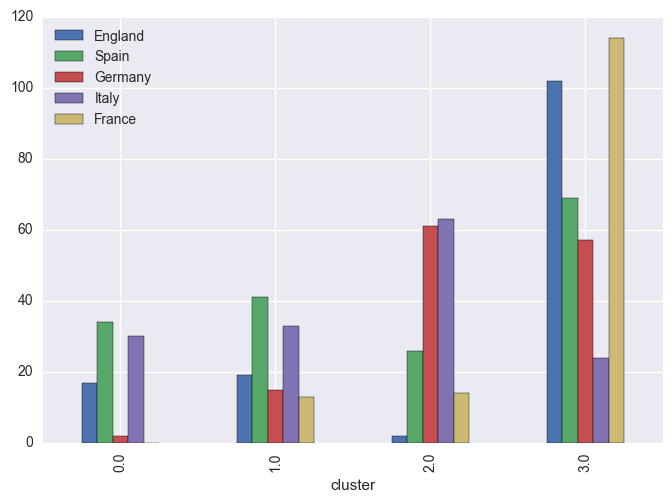

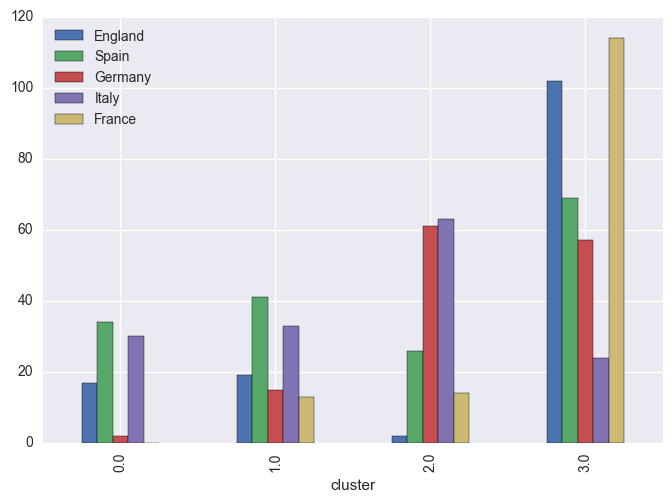

In [268]:
league_clust.groupby('cluster').max().plot.bar()
plt.show()

In [243]:
#epl_17_predict[['Team1','Team2']].stack()
pd.melt(epl_17_predict, id_vars = ['cluster','date'], value_vars = ['Team1','Team2'], value_name = 'team')

,cluster,date,variable,team
0,3.0,2017-02-11,Team1,Arsenal
1,3.0,2017-02-11,Team1,Manchester Utd
2,3.0,2017-02-11,Team1,Middlesbrough
3,1.0,2017-02-11,Team1,Stoke City
4,3.0,2017-02-11,Team1,Sunderland
5,3.0,2017-02-11,Team1,West Ham
6,0.0,2017-02-11,Team1,Liverpool
7,0.0,2017-02-12,Team1,Burnley
8,3.0,2017-02-12,Team1,Swansea
9,3.0,2017-02-13,Team1,Bournemouth
